# problem 3 a

In [2]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics,preprocessing,tree,model_selection
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO

import pydotplus
from IPython.display import Image
import random
import math

%matplotlib inline

# read data into a DataFrame
data_train = pd.read_csv('blogData_train.csv',header=None,index_col=False) 
data_test = pd.read_csv('blogData_test.csv',header=None,index_col=False)
data_validate = pd.read_csv('blogData_validate.csv',header=None,index_col=False)

data_train= np.array(data_train)
X_train = data_train[:,0:280]
y_train = data_train[:,280]
N_train = len(y_train)

data_test= np.array(data_test)
X_test = data_test[:,0:280]
y_test = data_test[:,280]
N_test = len(y_test)

data_validate= np.array(data_validate)
X_validate = data_validate[:,0:280]
y_validate = data_validate[:,280]
N_validate = len(y_validate)

#standardization
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_validate = min_max_scaler.transform(X_validate)
X_test = min_max_scaler.transform(X_test)

In [16]:

def gd_tree(Xarray,yarray,boosting_times,shrink,loss_func,Xnew):
    reg0 = tree.DecisionTreeRegressor(max_depth=1,random_state=0,criterion='mse') 
    reg0.fit(Xarray, yarray)
    yarrayhat = reg0.predict(Xarray)
    ynew = reg0.predict(Xnew)
    reg = tree.DecisionTreeRegressor(random_state=0,criterion='mse')    
    if (loss_func=='mse'):
        for i in range(boosting_times):
            r = yarray-yarrayhat
            reg.fit(Xarray, r)
            h = reg.predict(Xarray)
            h2 = reg.predict(Xnew)
            yarrayhat = yarrayhat + shrink*h
            ynew = ynew + shrink*h2
            
    elif(loss_func=='mae'):
        for i in range(boosting_times):
            r = np.sign(yarray-yarrayhat)
            reg.fit(Xarray, r)
            h = reg.predict(Xarray)
            h2 = reg.predict(Xnew)
            yarrayhat = yarrayhat + shrink*h
            ynew = ynew + shrink*h2
     
    return ynew


# problem 3 b

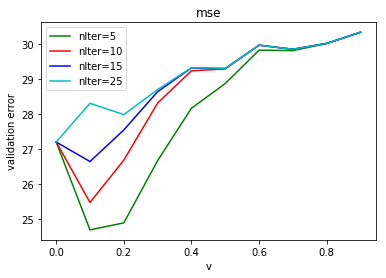

In [17]:
vali_error=np.zeros((4,10))
i=0
#mse
for nIter in [5,10,15,25]:
    j=0
    for v in np.arange(0, 1, 0.1):
        y_validatehat = gd_tree(X_train,y_train,nIter,v,'mse',X_validate)
        vali_error[i][j] = np.sqrt(metrics.mean_squared_error(y_validatehat,y_validate))
        j=j+1
    i=i+1

#draw vali_error from the validation set

x=np.arange(0, 1, 0.1)
ax = plt.gca()

ax.plot(x, vali_error[0,:],'g',label = 'nIter=5')
ax.plot(x, vali_error[1,:],'r',label = 'nIter=10')
ax.plot(x, vali_error[2,:],'b',label = 'nIter=15')
ax.plot(x, vali_error[3,:],'c',label = 'nIter=25')

plt.xlabel('v')
plt.ylabel('validation error')
plt.title('mse')
plt.legend()
plt.show()


In [24]:
re_mse=np.where(vali_error==np.min(vali_error))
n=[5,10,15,25]
nIter_mse=n[re_mse[0][0]]
v_mse=x[re_mse[1][0]]
print('the optimal mse model has the nIter with the value',nIter_mse)
print('and v with the value',v_mse)

For the loss type is mean squared error:The optimal model is when v is 0.1 and nIter is 10. At this time, the validation error comes to the lowest. We can deduce from the the plots this trend-- when v goes up, the RMSE goes down first and then goes up; when nIter goes up, the RMSE goes up.

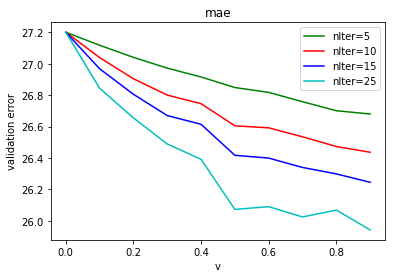

the optimal mae model has the nIter with the value 25
and v with the value 0.9


In [32]:
vali_error=np.zeros((4,10))
i=0
#mae
for nIter in [5,10,15,25]:
    j=0
    for v in np.arange(0, 1, 0.1):
        y_validatehat = gd_tree(X_train,y_train,nIter,v,'mae',X_validate)
        vali_error[i][j] = np.sqrt(metrics.mean_squared_error(y_validatehat,y_validate))
        j=j+1
    i=i+1

#draw vali_error from the validation set

x=np.arange(0, 1, 0.1)
ax = plt.gca()

ax.plot(x, vali_error[0,:],'g',label = 'nIter=5')
ax.plot(x, vali_error[1,:],'r',label = 'nIter=10')
ax.plot(x, vali_error[2,:],'b',label = 'nIter=15')
ax.plot(x, vali_error[3,:],'c',label = 'nIter=25')

plt.xlabel('v')
plt.ylabel('validation error')
plt.title('mae')
plt.legend()
plt.show()

re_mse=np.where(vali_error==np.min(vali_error))
n=[5,10,15,25]
nIter=n[re_mse[0][0]]
v=x[re_mse[1][0]]
print('the optimal mae model has the nIter with the value',nIter)
print('and v with the value',v)

For the loss type is mean absoslute error:The optimal model is when v is 0.9 and nIter is 25. At this time, the validation error comes to the lowest. We can deduce from the plots -- Either nIter or v goes up, the RMSE goes down. So given the same RMSE, if the v is small, the nIter should be big.  

# problem 3 c

In [21]:
#mse

y_testhat_mse = gd_tree(X_train,y_train,nIter_mse,v_mse,'mse',X_test)

vali_error_mse = np.sqrt(metrics.mean_squared_error(y_testhat_mse,y_test))

print("When using the optimal parameters on test data, validation error with mse loss function is",vali_error_mse)



When using the optimal parameters, validation error with mse loss function is 24.9898888739


In [31]:

#mae
y_testhat_mae = gd_tree(X_train,y_train,nIter_mae,v_mae,'mae',X_test)

vali_error_mae = np.sqrt(metrics.mean_squared_error(y_testhat_mae,y_test))

print("When using the optimal parameters on test data, validation error with mae loss function is",vali_error_mae)

When using the optimal parameters, validation error with mae loss function is 25.1713995395
